# Домашнее задание №2 - Линейные модели. Градиентный спуск

В этом домашнем задании мы с вами научимся обучать линейные модели регрессии и классификации при помощи очень мощного, но в то же время довольно понятного алгоритма, который называется **градиетный спуск**. Помимо линейных моделей он используется и для обучения самых сложных нейронных сетей! Также мы потренируемся применять готовые реализации линейных моделей для задач регрессии и бинарной классификации.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd
import pylab

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import (r2_score,
                             mean_squared_error)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [92]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

#### Маленькое теоретическое отступление

Основное свойство антиградиента (-1 * градиент) &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента, пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (коэффициентов линейной модели) ((например, нулевой или сгенерированный из некоторого, случайного распределения)). Тогда обычный градиентный спуск состоит в повторении следующих шагов до сходимости:


$$
    w_{k + 1} = w_{k} - \eta \nabla_{w} Q(w_{k}),
$$

где $\nabla_{w} Q(w_{k})$ &ndash; градиент функции потерь в точке $w_k$, а $\eta$ &ndash; скорость обучения (learning rate).

Градиентный спуск обычно останавливают, когда прошло заданное максимальное количество итераций или когда графиент близок к нулю (т.е. наши параметры практически не меняются). Для реализации второго варианта считают норму градиента (по сути длину вектора). Это можно сделать несколькими способами:

$$
l1_{norm} = \sum{|w_i|}
$$

$$
l2_{norm} = \sum{(w_i)^{2}}
$$

Попробуем разобраться на простом примере. Рассмотрим функцию от двух переменных:
$f(x, y) = \sin^2 x + \sin^2 y$

In [93]:
def f(w):
    """
    :param w: np.array(np.float) вектор из 2-х элементов
    :return: np.float
    """
    
    return np.sum(np.sin(w)**2)

Обратите внимание, что $x$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинном обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $w_1$ и $w_2$ такие, что при них значение $f(w_1, w_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**.

### Задание 1. Градиентный спуск для функции $f$ (1 балл)

Реализуйте функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [94]:
def grad_f(w): 
    """
    Градиент функциии f, определенной выше.
        :param w: np.array[2]: float вектор из 2-х элементов
        :return: np.array[2]: float вектор из 2-х элементов
    """
    
 
    grad = 2*np.cos(w)*np.sin(w)
    #grad[1] = 2*np.cos(w[1])*np.sin(w[1])
    
    return grad
#w = np.array([1, 2])
#grad_f(w)


Проверим, что градиент принимает вектор из двух чисел и выдает на этой точке верное значение

In [95]:
assert np.allclose(grad_f(np.array([1, 2])), 
                   np.array([0.90929743, -0.7568025])), "Что-то не так!"

In [96]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: функция, возвращающая градиент функции f (устроена как реализованная вами выше grad_f)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    
    w0 = np.random.random(2)

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла == шаг градиентнго спуска
    curr_w = w0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_w, f(curr_w)))
        history.append(entry)
    
        curr_w -= lr*grad_f(curr_w)
        #curr_w = -= lr*grad_f(curr_w)

    return np.vstack(history)


Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $w_1, w_2, f(w_1, w_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму (Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_w_1, cur\_w_2, f(cur\_w_1, cur\_w_2)$ в `steps` в процессе спуска).

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точек минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [97]:
def gradient_desc_vis(f, grad_f, lr=0.1, num_iter=20):
    steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)
    
    X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(projection="3d")

    zs = np.array([f(np.array([x,y]))
                  for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)


    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

    ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
            marker="*", markersize=20, zorder=3, 
            markerfacecolor="y", lw=3, c="black")

    ax.set_zlim(0, 5)
    ax.view_init(elev=60)
    plt.show()
    
    return steps

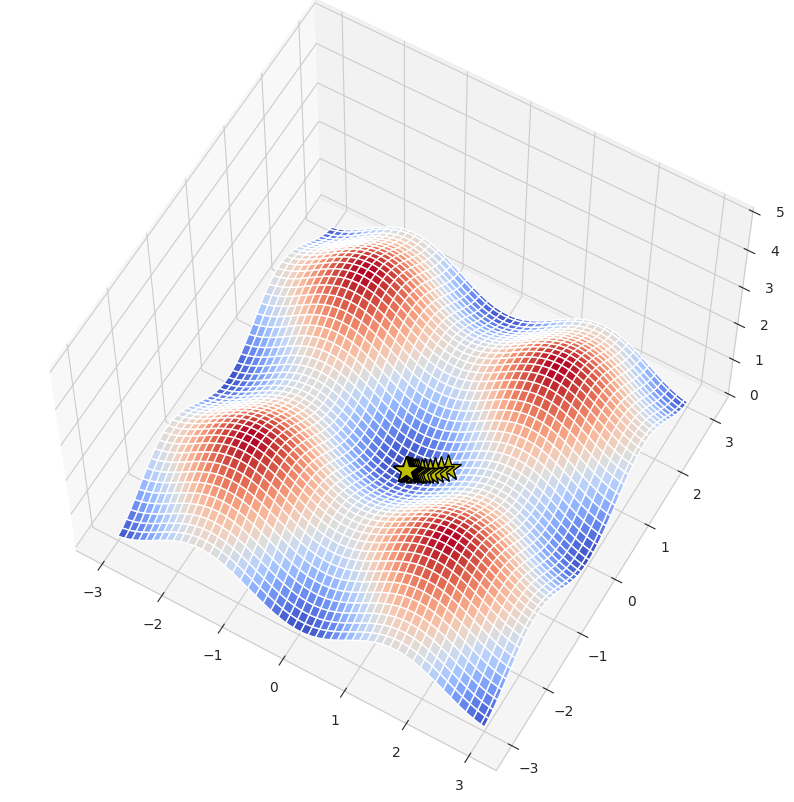

In [98]:
steps = gradient_desc_vis(f, grad_f)
#print(steps)

Посмотрим на зависимость значения функции от шага градиентного спуска.

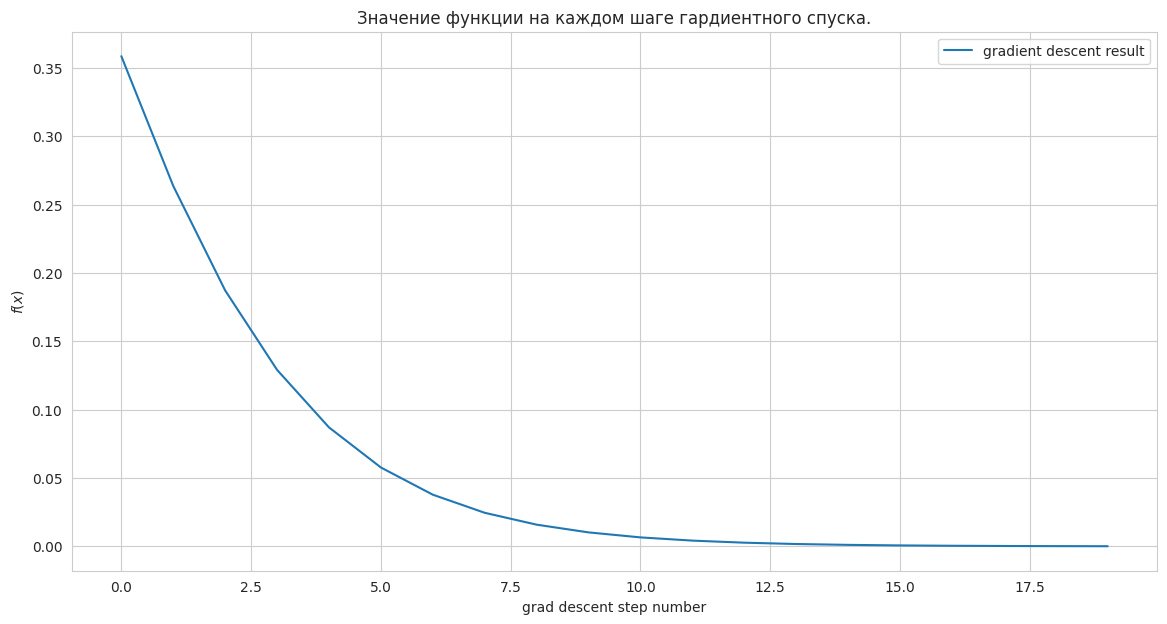

In [99]:
plt.figure(figsize=(14,7))
plt.xlabel("grad descent step number")
plt.ylabel("$f(x)$")
plt.title("Значение функции на каждом шаге гардиентного спуска.")

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label="gradient descent result")
plt.legend();

### Задание 2. Реализация линейной регресии (суммарно 9 баллов)

Так как мы будем использовать градиентный спуск для обучения модели, важной часть является реализация функции потерь и функции для расчета ее градиента. Перем началом стоит напомнить, как считать градиент MSE. Вывод этой формулы можно найти  [здесь](https://medium.com/analytics-vidhya/linear-regression-gradient-descent-intuition-and-math-c9a8f5aeeb22)

$$
    MSE = \frac{1}{N}\sum(y_{true} - y_{pred}) ^ 2
$$

$$
    \nabla{MSE} = \frac{2}{N} X^T (y_{pred} - y_{true})
$$

Здесь имеется в виду именно матричное умножение.

#### Задание 2.1. MSE и ее градиент (2 балла)

In [100]:
def mse(y_true, y_pred):
    """
    Функция потерь MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        

    return np.sum(np.square(y_true - y_pred))/len(y_true)


def mse_grad(y_true, y_pred, X):
    """
    Функция для расчета градиента MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: градиент функции потерь MSE
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    return 2*np.dot(np.transpose(X), np.subtract(y_pred, y_true))/ len(y_true)


class MSELoss:
    """
    Класс, реализующий функцию потерь MSE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return mse(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return mse_grad(y_true, y_pred, X)

Мы будем использовать следующий класс для расчета градиента наших функций потерь:

In [101]:
class BasicGradientDescent:
    """
    Класс, позволяющий делать шаги градиентного спуска,
    а также рассчитывающих норму градиента.
    """
    
    def __init__(self, loss_function, grad_norm):
        self.loss = loss_function
        self.grad_norm = grad_norm
        
    
    def step(self, y, y_pred, X):
        grad_i = self.loss.calculate_gradient(y, y_pred, X)
        grad_i_norm = self._calculate_grad_norm(grad_i)
        
        return grad_i, grad_i_norm
            
            
    def _calculate_grad_norm(self, grad_i):
        if self.grad_norm == "l1":
            return np.abs(grad_i).sum()
        elif self.grad_norm == "l2":
            return np.sqrt(np.square(grad_i).sum())
        else:
            raise ValueError(f"I can't calculate {self.grad_norm} norm of gradient")

В данном задании нужно будет реализовать линейную регрессию и обучить ее при помощи градиентного спуска. Для этого нужно будет заполнять пропуски кода в соответствующих классах. Для начала мы реализуем базовый класс для всех линейных моделей, от которого потом будем наследоваться при реализации линейной и логистической регресий. Не переживайте, этот класс уже реализован, вам достостаточно просто разобраться с кодом.

In [102]:
class BaseLinearModel:
    """
    Класс, который представляет из себя базовую линейную модель, наследуюясь от которого, мы будем
    реализовывать линейную и логистическую регрессии.
    """
    
    def __init__(self, learning_rate, 
                 loss_function, fit_intercept,
                 n_iter, tol, optimizer, grad_norm):
        """
        Конструктор нашего класса. 
            :param learning_rate: скорость обучения
            :param loss_function: функция потерь (MSE или кросс-энтропия)
            :param fit_intercept: нужно ли нам включать свободных член в модель
            :param n_iter: количество итераций градиентного спуска
            :param tol: параметр для остановки градиентного спуска,
                        если норма градиента (l1 или l2) меньше tol, то останавливаемся
            :param optimizer: класс, который будет рассчитывать градиент и его норму
            :param grad_norm: тип нормы градиента l1 или l2
        """
        
        self.learning_rate = learning_rate
        self.loss = loss_function
        self.fit_intercept = fit_intercept
        self.n_iter = n_iter
        self.tol = tol
        self.grad_norm = grad_norm
        self.optimizer = optimizer(loss_function, grad_norm)
        
        # В начале параметры модели не заданы
        self.W = None
        
        
    def fit(self, X, y):
        """
        Метод для обучения нашей модели 
            :param X: матрица объекты x признаки
            :param y: вектор значений целевой переменной
            :return: обученная модель
        """
        
        # Сделаем из y вектор-столбец (n_samples, 1)
        y = y.reshape(-1, 1)
        n_samples = X.shape[0]
        
        # Добавим колонку из 1 в матрицу X
        if self.fit_intercept:
            ones_column = np.ones((n_samples, 1))
            X_new = np.hstack((ones_column, X))
        
        n_features = X_new.shape[1]
        
        # Инициализируем веса модели
        if self.W is None:
            self.W = np.random.randn(n_features, 1)
        
        # Обучаем модель градиентным спуском
        for i in range(self.n_iter):
            y_pred = self.predict(X)
            grad_i, grad_i_norm = self.optimizer.step(y, y_pred, X_new)
            
            # Если градиент близок к 0, останавливаемся
            if grad_i_norm <= self.tol:
                return self
            
            else:
                self.W -= self.learning_rate * grad_i
        
        return self
    
    
    def predict(self, X):
        raise NotImplementedError("It is a basic class for all linear models. You should implement it for descendant class.")
    
    
    def __repr__(self):
        return "Base linear model without prediction skill :("

#### Задание 2.2. Предсказания линейной регрессии (3 балла)

Реализуйте метод `predict` у класса `CustomLinearRegression`, не забудьте про свободный член!

In [103]:
class CustomLinearRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-2, 
                 loss_function=MSELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        # Если вы не проходили наследование и в частности `super`, то не страшно
        # коротко, с помощью этого мы можем вызывать методы родительского класса
        # в частности здесь мы используем метод `init`
        super().__init__(learning_rate=learning_rate, 
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
        
    
    def predict(self, X_test):
        """
        Метод для вычисления предсказаний 
            :param X_test: np.array[n_test_samples, n_features]: 
                           матрица объекты x признаки (тестовый датасет)
            :return: y_pred: np.array[n_test_samples, 1]: предсказания модели
        """
        
        if self.W is None:
            raise NotFittedError("This CustomLinearRegression instance is not fitted yet, run fit method.")
        
        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
            
        return np.dot(X_test, self.W)
        
    
    
    def __repr__(self):
        return "My custom linear regression"

##### Проверим нашу реализацию на простом примере

In [104]:
X = np.random.randn(100, 1)
y = 2 * X + 5 + 0.5 * np.random.randn(100, 1)

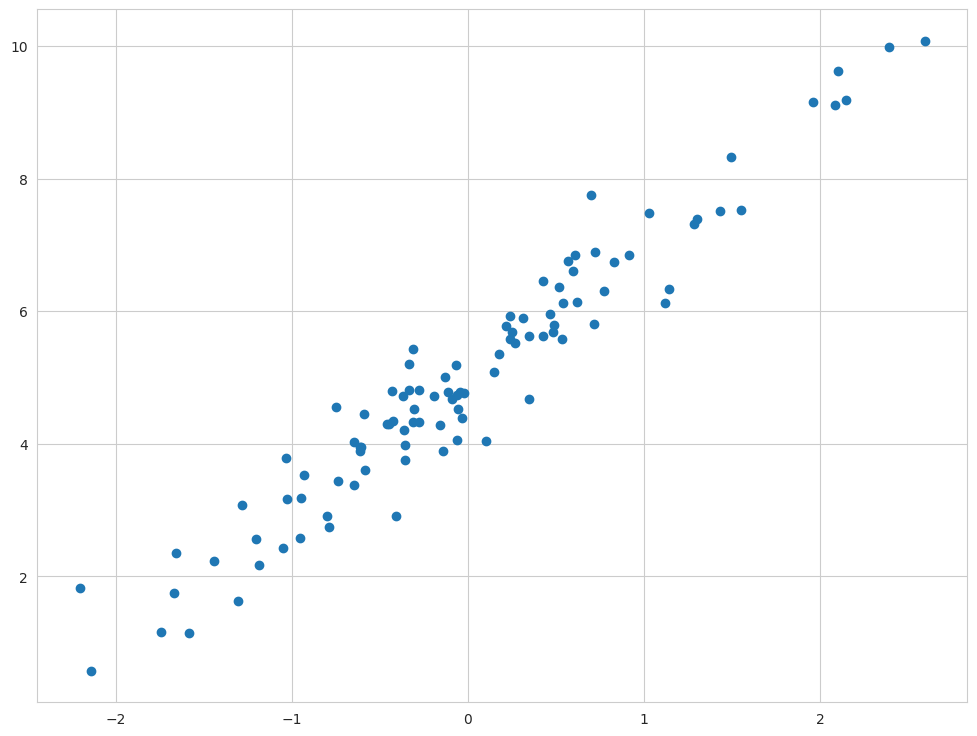

In [105]:
plt.scatter(X, y);

In [106]:
custom_lin_reg = CustomLinearRegression()

In [107]:
custom_lin_reg.fit(X, y)

My custom linear regression

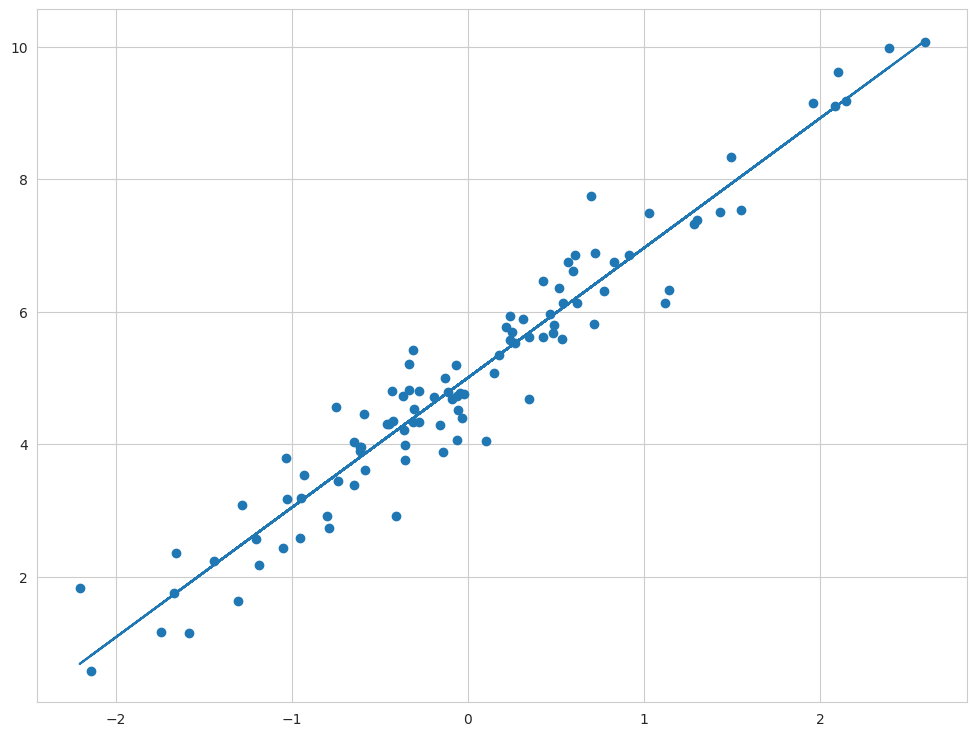

In [108]:
plt.scatter(X, y)
plt.plot(X, custom_lin_reg.predict(X));

#### Задание 2.3. Используем встроенную линейную регрессию (4 балла)

Поработаем с данными о ценах на дома в Калифорнии. Постройте модель линейной регресии при помощи `LinearRegression` из `sklearn`. Не забудьте разделить данные на тренировочную и тестовую части, а также правильно предобработать признаки. В конце воспользуйтесь какими-то изученными метриками регресии и сделайте выводы о качестве полученной модели, а также о том, какие признаки наиболее важны с точки зрения полученной модели.

In [109]:
data = fetch_california_housing()
X, y = data["data"], data["target"]
feature_names = data["feature_names"]
#type(data)


Ваш ход:

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Number of dublicates = 0 



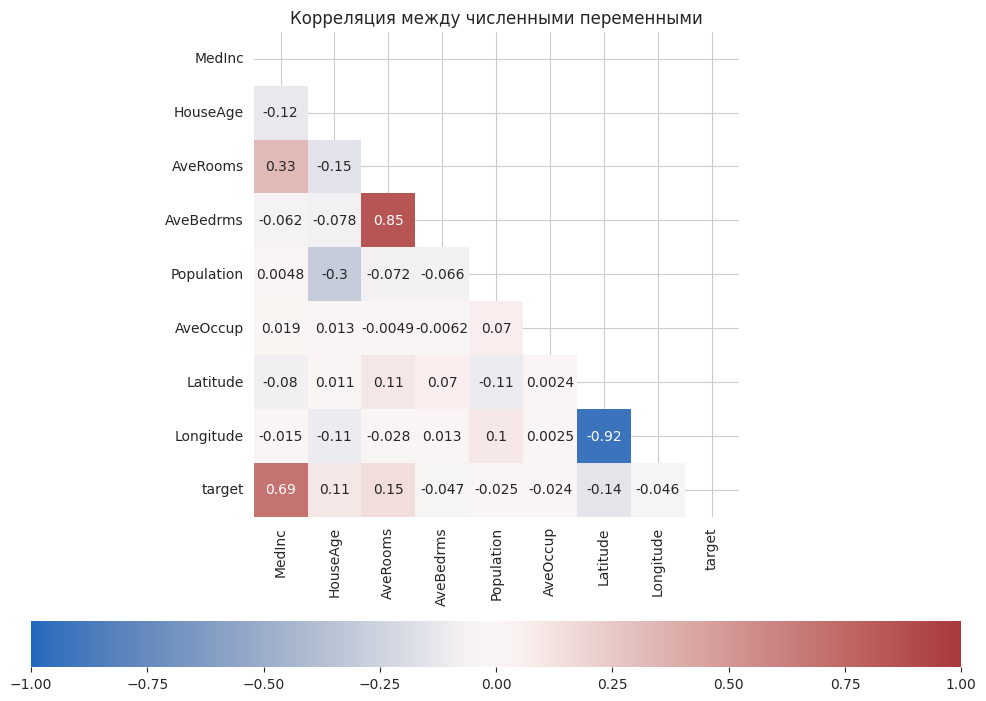

In [110]:

#сделаем EDA
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
display(df.head())
display(df.describe())
df.isnull().sum()
print('Number of dublicates =', len(df) - len(df.drop_duplicates()), "\n")  

    # создание heatplot корреляции
tr = np.triu(df.corr())
#pylab.subplot (1, 2, 2)
sns.heatmap(df.corr(), annot = True, cbar_kws= {'orientation': 'horizontal'},  vmin=-1, vmax=1, center= 0, square=True, cmap="vlag", mask = tr)
pylab.title ("Корреляция между численными переменными")
pylab.show()



Анализ выбросов


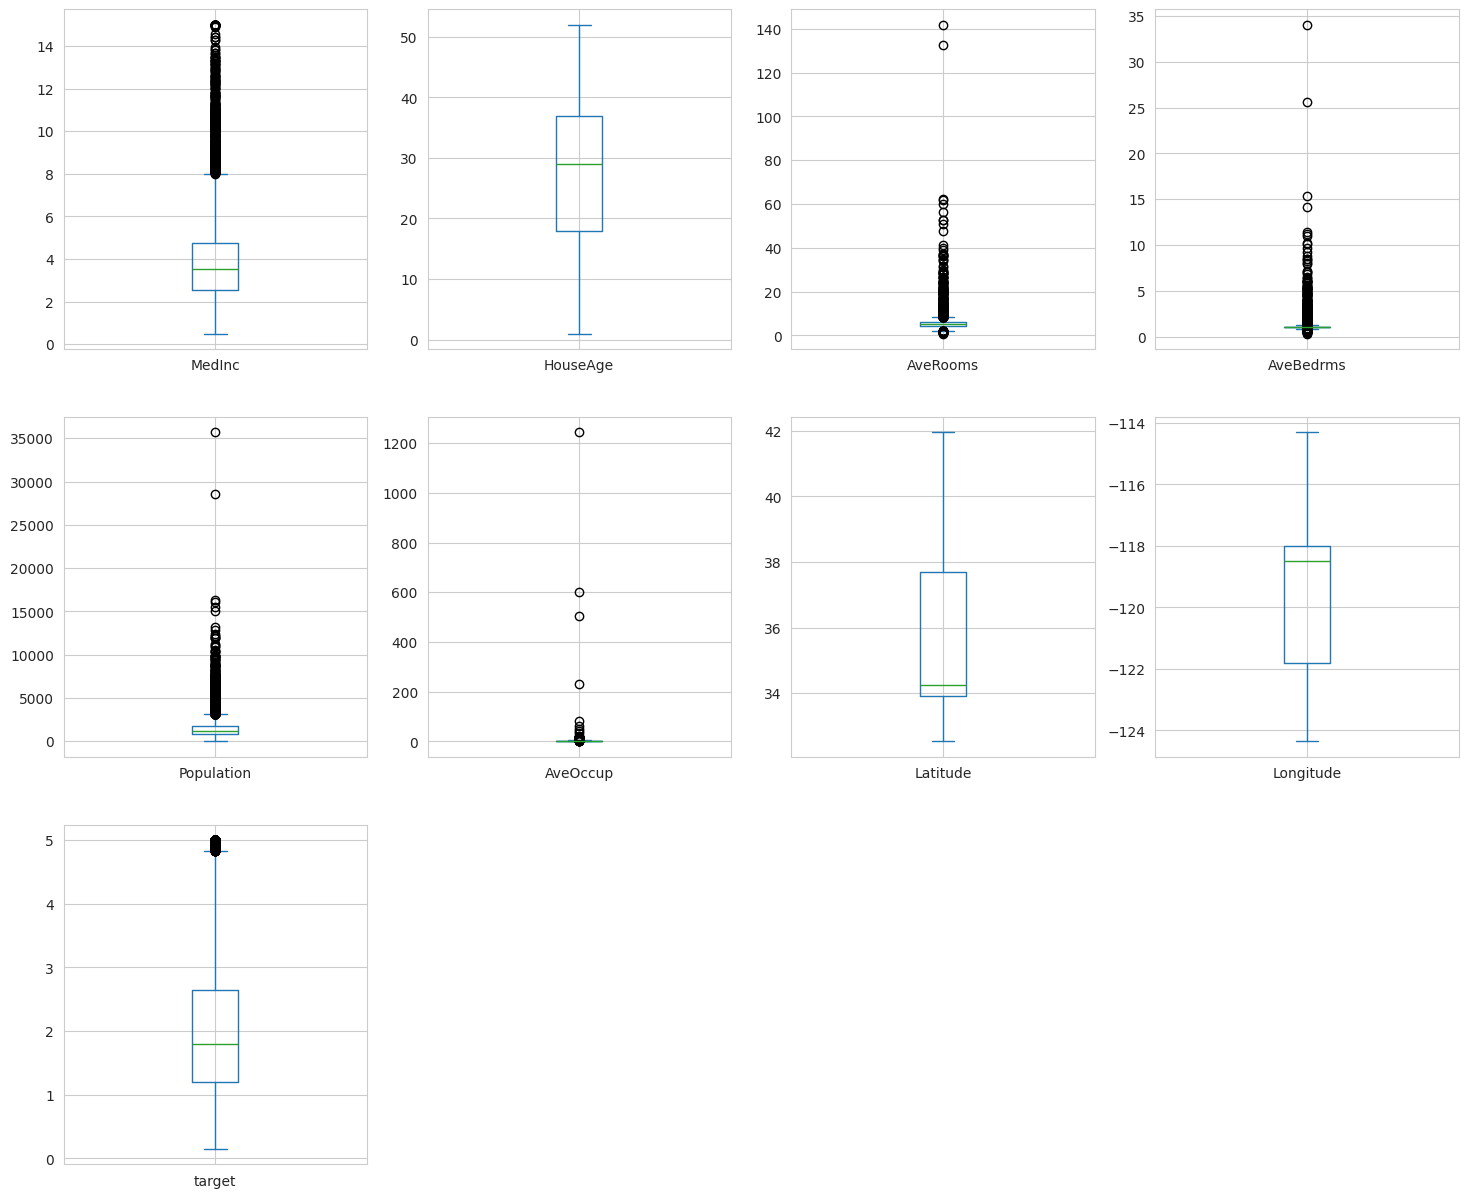

In [111]:
print('Анализ выбросов')
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()


Видим, что все данные численные, (различные количественные показатели и географическая координата) нет категориальных данных, и пропущенных значений нет, кажется, можно обойтись без предобрадотки. Есть значения выпадающие по количеству проживающих. Но это могут быть большие многокварирые дома или коммуны стартаперов, и пока не очень понятно, что мы хотим предсказывать, цену на адекватные домики для одной семьи, или на все подряд. Так же есть выбросы по количеству комнат на одного проживающего.  Коррелируют широта и долгота, но так как это координата оставим обе. И среднее количество спален/комнат, эти параметры стандартизованы на одного проживающего, поэтому пока в целом не очень понятно, как они могут повлиять. Поэтому для первой модели я бы оставила как есть,чтобы она работала на разнообразных данных.


In [112]:
#print(feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)
#стандартизация, может, уберу потом
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2: %.2f" % r2_score(y_test, y_pred))
#print(y_pred)
# The coefficients
print("Coefficients:")
feature_weight = lr_model.coef_
importance = pd.Series(feature_weight, index=feature_names)
display(importance)




Mean squared error: 0.54
r2: 0.60
Coefficients:


MedInc        0.436083
HouseAge      0.009534
AveRooms     -0.102805
AveBedrms     0.622071
Population   -0.000005
AveOccup     -0.003504
Latitude     -0.418006
Longitude    -0.430150
dtype: float64

Видим, что ошибка mse составляет 0.54,  r2 0.6, кажется, это не лучшие показатели, хоть и неплохие. Мы уже можем посмотреть на соотношение коэффициентов, но все же более правильным будет работать на стандартизованных данных, чтобы иметь возможность более корректно оперировать значениями коэффициентов регрессии

In [113]:
#сделаю то же самое со стандартизованным датасетом
lr_model_sc = LinearRegression()
lr_model_sc.fit(X_train_scaled, y_train)
y_pred = lr_model_sc.predict(X_test_scaled)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2: %.2f" % r2_score(y_test, y_pred))
feature_weight = lr_model_sc.coef_
importance = pd.Series(feature_weight, index=feature_names)
print('вклад параметров в модель')
display(importance)


Mean squared error: 0.54
r2: 0.60
вклад параметров в модель


MedInc        0.827999
HouseAge      0.120088
AveRooms     -0.260483
AveBedrms     0.303874
Population   -0.006107
AveOccup     -0.039447
Latitude     -0.893366
Longitude    -0.861458
dtype: float64

получили показатели r2 и mse, аналогичные нестандартизованному датасету.
Наибольшее влияние имеют признаки с наибольшим по модулю коэффициентом. То есть MedInc (показатель дохода, в этой территории) И географическое положение дома Latitude, Longitude (с обратным знаком).Чем юго-западнее, тем дороже, что кажется, логичным для Калифорнии. Можно посмотреть наглядно. (см ниже) Похоже, на очертания побережья). Дальше вклад вносят количество спален и количество комнат (причем, с проивоположными знаками, и возраст дома). Заселенность территории и среднее количество проживающих внесли наименьший вклад в модель


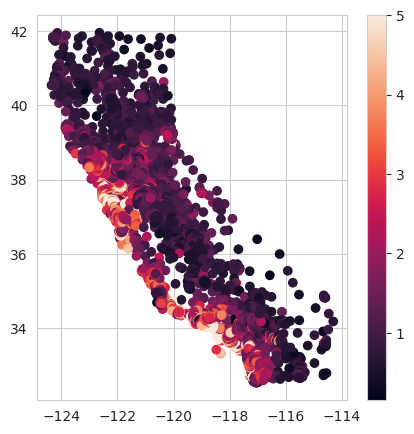

In [114]:
#Распределение целевой переменной от координаты
plt.figure(figsize=(5, 5))
plt.scatter(data = df , x="Longitude" , y="Latitude" , c =df["target"]  )
plt.colorbar ()
plt.show()

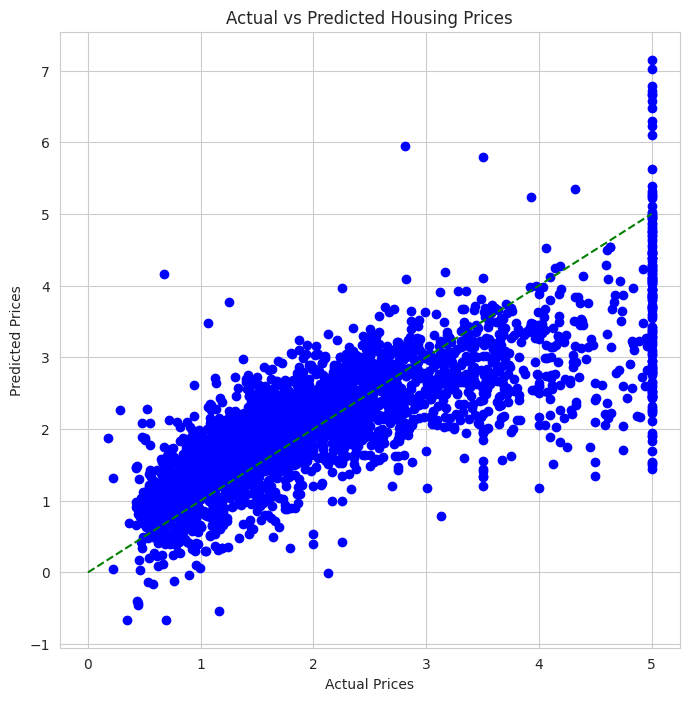

In [115]:
# посмотрим как коррелируют предсказанные и реальные значения
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue')
a = np.linspace(0, 5, 20)
b = a
plt.plot(a, b, linestyle='--', color='green', label='x = y')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()



Видно, что в целом значения ложатся на линию тренда, но есть и отрицательные значения, и странное поведение, для большого количества домов со стоимостью 5. Наверное, на эту часть надо посмотреть внимательнее. Почему так много домов с такой стоимостью? почему они так по-разному предсказываются моделью. Возможно их стоит удалить из данных, потому что они не отражают реальную, а какую-то "максимальную" стоимость дома, будто все числа больше 5 свели к 5. в общем для меня это что-то что требует дальнейшего анализа, ну я бы так сделала, но надеюсь пока достаточно для дз, но если у меня будет время я бы удалила и попробовала без них посмотреть. Они завышают линию треда.

Я бы хотела на лекции или консультации обсудить в целом общие подходы к оценке и обработке данных при обучении. Я понимаю, как я работаю с данными если я хочу описать как можно лучше свои, но пока вообще не понимаю в контексте машинного обучения. Выбросы, вот эти странные дома максимальной стоимости


In [116]:
count_target_5 = np.count_nonzero(y_test == 5.000010)
print('в тестовой части target')
print('всего значений в выборке=', len(y_test), 'из них уникальных=', len(np.unique(y_test)), 'число значений равных максимуму=', (count_target_5))
print('весь датасет')
print('всего значений в выборке=', len(y_train), 'из них уникальных=', len(np.unique(y_train)), 'число значений равных максимуму=', np.count_nonzero(y_train == 5.000010))

в тестовой части target
всего значений в выборке= 3096 из них уникальных= 1809 число значений равных максимуму= 142
весь датасет
всего значений в выборке= 17544 из них уникальных= 3714 число значений равных максимуму= 823


Действительно, слишком много для одного уникального значения

### Задание 3. Реализация логистической регресии (суммарно 10 баллов)

Логистическая регрессия не очень сильно отличается от обычной линейной регрессии и используется в задах классификации. Так как здесь мы снова будем пользоваться градиентным спуском, то нужно определить функцию потерь и ее градиент. Одним из самых популярных вариантов в задаче бинарной классификации является бинарная кросс-энтропия (BCE).

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Единственная проблема данной функции это возможность получить 0 под знаком логарифма, что не очень хорошо. Попробуем справить с этим "в лоб". Скажем, что наши предсказания могут принимать значения от 0 + eps до 1 - eps, где eps очень маленькое число.

#### Задание 3.1. Реализация сигмоиды (0.5 баллов)

Реализуйте функцию `sigmoid`, которая переводит действительное число $\mathbb R$ в вероятность $[0,1]$.

In [117]:
def sigmoid(output):
    # output результат X@w (-inf, +inf)
    return 1/(1 + np.exp(-output))

#### Задание 3.2. BCE Loss и ее градиент (2.5 балла)

Так как мы с вами только начинаем изучать машинное обучение, то было бы слишком жестоко просить вас вычислить градиент BCE Loss (он не так сложен, просто нужно привыкнуть). Поэтому сразу напишем формулу для него:

$$
\nabla{\mathcal L_{BCE}(y, \hat y), X} = X^T (\sigma({\hat{y}}) - y)
$$

In [118]:
def bce(y_true, y_pred, eps=1e-15):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    n = y_true.shape[0]
    
    # So I want escape log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss
    

def bce_grad(y_true, y_pred, X):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    grad_loss = np.dot(np.transpose(X), y_pred - y_true)
    return grad_loss


class BCELoss:
    """
    Класс, реализующий функцию потерь BCE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return bce(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return bce_grad(y_true, y_pred, X)

#### Задание 3.3. Предсказания логистической регрессии (2 балла)

Реализуйте метод `predict` у класса `CustomLogisticRegression`, не забудьте про свободный член!

In [119]:
class CustomLogisticRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-3,
                 loss_function=BCELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        super().__init__(learning_rate=learning_rate,
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
    
    
    def predict(self, X_test):
        if self.W is None:
            raise NotFittedError("This CustomLogisticRegression instance is not fitted, run fit method.")
        
        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
            pred1 = sigmoid(np.dot(X_test, self.W))
            #pred_boolean = (pred >= 0.5).astype(int)
        return pred1
    
    
    
    def __repr__(self):
        return "My custom logistic regression"

#### Снова проверим работу алгоритма на простом примере

In [120]:
# Создадим датасет из 1 признака и 2 классов
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1)

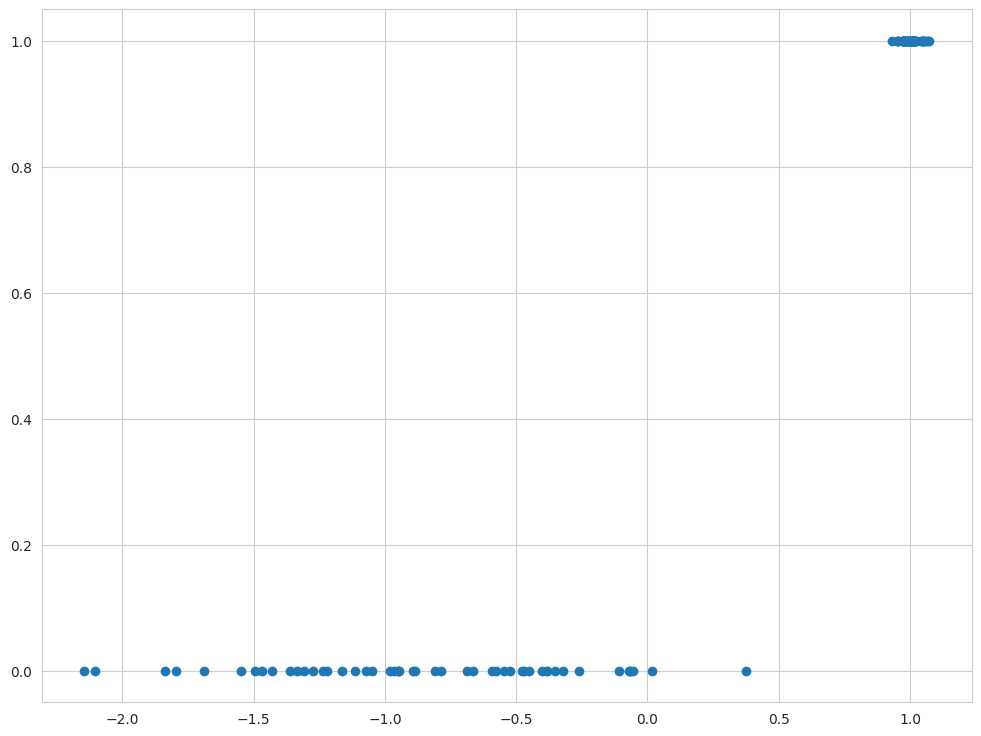

In [121]:
plt.scatter(X, y);

In [122]:
custom_log_reg = CustomLogisticRegression()
custom_log_reg.fit(X, y)
y_pred = custom_log_reg.predict(X)

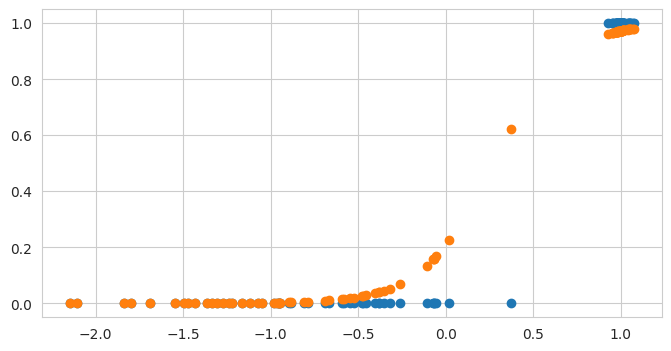

In [123]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.scatter(X, y_pred);

Проверьте качество работы модели при помощи известных вам метрик бинарной классификации.

In [124]:
y_pred = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 Score = ", f1)
#print("ROC AUC Score = ", roc_auc)

Accuracy =  0.99
Precision =  0.9803921568627451
Recall =  1.0
F1 Score =  0.9900990099009901


Все метрики равны или близки к единице. Хорошо работает

#### Задание 3.4. Применение логистической регрессии (5 баллов)

Мы будем использовать данные по свойствам покемонов (https://www.kaggle.com/abcsds/pokemon). В данном задании вам необходимо сначала сделать краткий EDA (Посмотреть на данные и их распределения, а также посмотреть, как различные признаки связаны между собой и с целевой переменной (`Legendary`)).

In [125]:
pokemon = pd.read_csv("../Data/Pokemon.csv")
print('общий вид датасета')
display(pokemon.head(10))
print('статистика по колонкам')
display(pokemon.describe())
print('тип данных по колонкам')
display(pokemon.info())
print('количество уникальных значений по колонкам')
display(pokemon.nunique())

общий вид датасета


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


статистика по колонкам


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


тип данных по колонкам
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


None

количество уникальных значений по колонкам


#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

Точно нужно убрать имя покемона из анализа, оно не делает его легендарным. или вынести его в индекс для строк. В категорианой переменной Type2 около половины значений NaN, их либо надо заменить новой категорией "нет признака", и дальше перевести в факторные переменные, но так как мы не знаем вклад каждого типа, то присвоив им численные переменные как уровни фактора  (а их 18, или 18 + NaN), можем  повлиять. Я бы убрала Type1  и Type2. Есть еще одна по сути категориальная переменная Generation, там 6 уровней, но ее можно оставить, так как хотя бы соблюдается порядок 1-6. Ещене очень понятно, что делать с колонкой Total, она суммирует все признаки(в итоге я пробовала с Total и без, получается примерно одинаково)

Мы будем предсказывать является ли покемон легендарным или нет. Замените логическое значение колонки на числовое (перекодировав на 0 и 1). Также подумайте, как в этом случае лучше закодировать категориальные признаки (может быть, лучше их просто выбросить?).

Посмотрим, как сбалансированы классы - увидим, что нет.
Посмотрим, как распределены легендарные в разных поколениях - увидим, что по-разному. Оставим переменную generation

<Axes: xlabel='Legendary', ylabel='Count'>

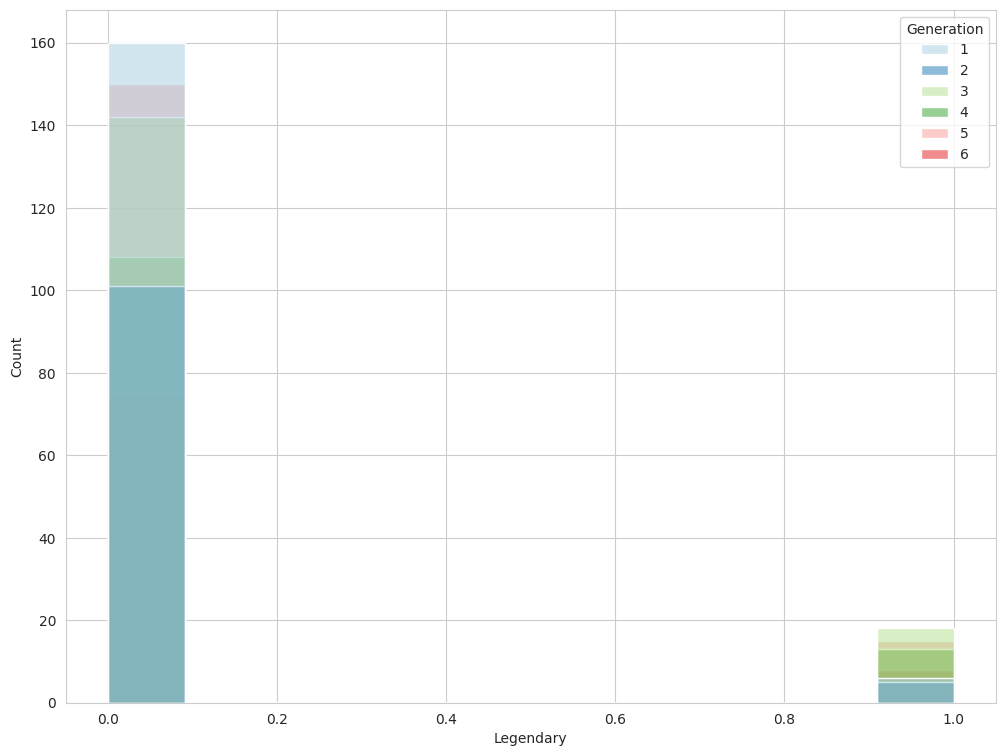

In [126]:
sns.histplot(data=pokemon, x='Legendary', hue='Generation', palette='Paired')

In [127]:
#удаляем колонки
pokemon = pd.read_csv("../Data/Pokemon.csv")
pokemon.set_index('Name', inplace = True)
pokemon.Legendary = pokemon.Legendary.replace({True : 1, False : 0})
pokemon.drop(columns = ['Type 1', 'Type 2', '#'], axis = 1, inplace = True)
#display(pokemon.head())

#lr_pokemon = lr_pokemon


/tmp/ipykernel_6941/1682429847.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pokemon.Legendary = pokemon.Legendary.replace({True : 1, False : 0})


Корреляция между численными переменными


<Axes: >

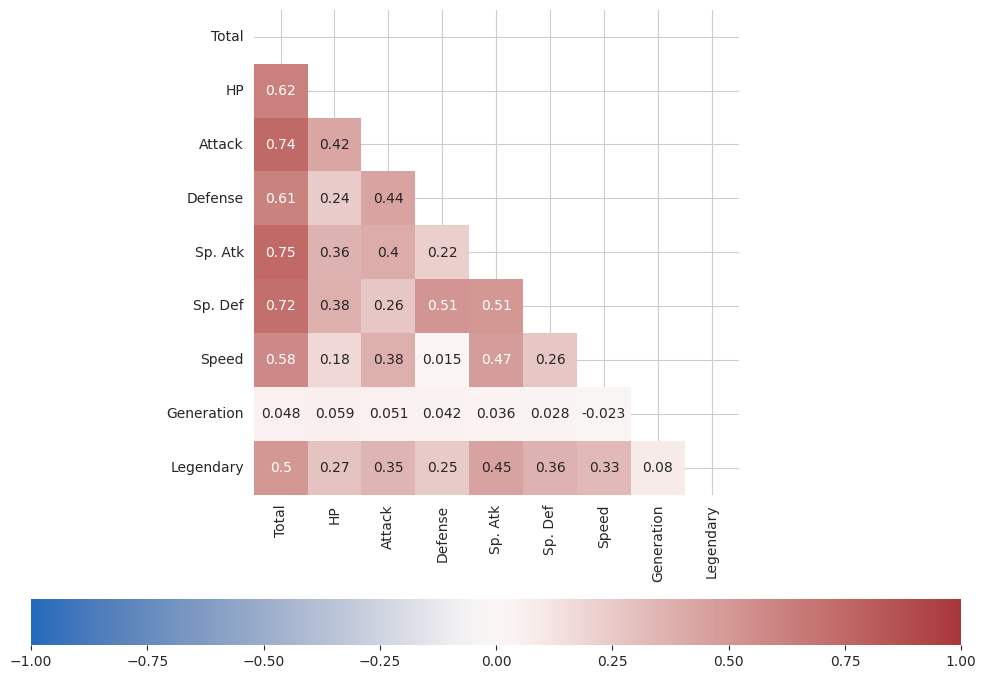

In [128]:
tr = np.triu(pokemon.corr())
print("Корреляция между численными переменными")
sns.heatmap(pokemon.corr(), annot = True, cbar_kws= {'orientation': 'horizontal'},  vmin=-1, vmax=1, center= 0, square=True, cmap="vlag", mask = tr)

Логично, что total коррелирует со всеми

Разделите ваши данные на тестовую и тренировочную выборку.

In [129]:
y = pokemon.Legendary
#я пробовала убирать и не убирать Total(он как бы объединяет все), результаты не очень менялись
X = pokemon.drop(columns = ['Legendary'], axis = 1)
#display(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)



Обучите модель `LogisticRegression` из `sklearn`.

In [130]:
# сделаем стандартизацию
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_model = LogisticRegression(max_iter = 2000)
log_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = log_model.predict(X_test)

Выведите метрики вашего классификатора:

1. Нарисуйте [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

2. Изобразите ROC кривую и посчитайте площадь под ней.

3. Скажите, какие признаки оказались наиболее важны для модели.

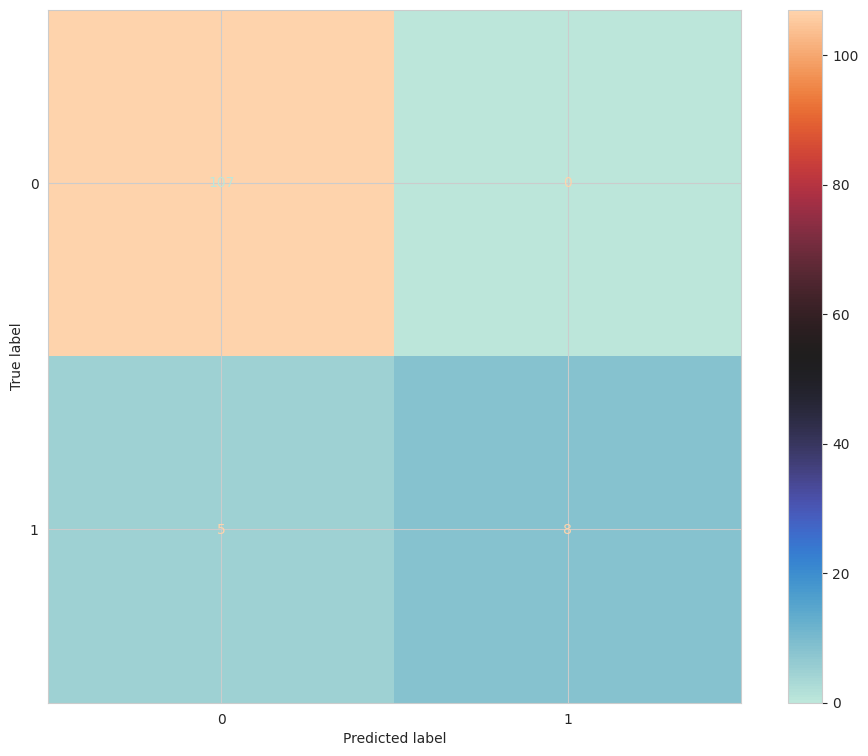

In [131]:

cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap="icefire")
plt.show()

In [132]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 Score = ", f1)
feature_weight = log_model.coef_.ravel()

importance = (pd.Series(feature_weight, index=X.columns))
print ('вклад параметров по возрастанию')
display(importance.sort_values())


Accuracy =  0.9583333333333334
Precision =  1.0
Recall =  0.6153846153846154
F1 Score =  0.7619047619047619
вклад параметров по возрастанию


Attack        0.288957
HP            0.452584
Generation    0.763874
Defense       0.781020
Sp. Atk       0.819114
Sp. Def       0.920676
Total         1.108238
Speed         1.182112
dtype: float64

видим, что есть проблема с recall, так как классы не сбалансированы, доля легендарных покемонов мала,и все (или  почти все) нелегендарные покемоны определяются как нелегендарные, что вносит отличный вклад в accuracy (поэтому accuracy тут не очень актуальна, но при этом несколько легендарных, определенных как нелегендарные, вносят большой вклад в не обнаружение положительных случаев, сооответственно в  recall ( и на него надо смотреть внимательнее)
Параметры, которые вносят наибольший вклад(Speed, Total,  Sp.Def, Generation, Sp. Atk, Defence) Если убрать Total, то примерно так же все останется. Есть ниже


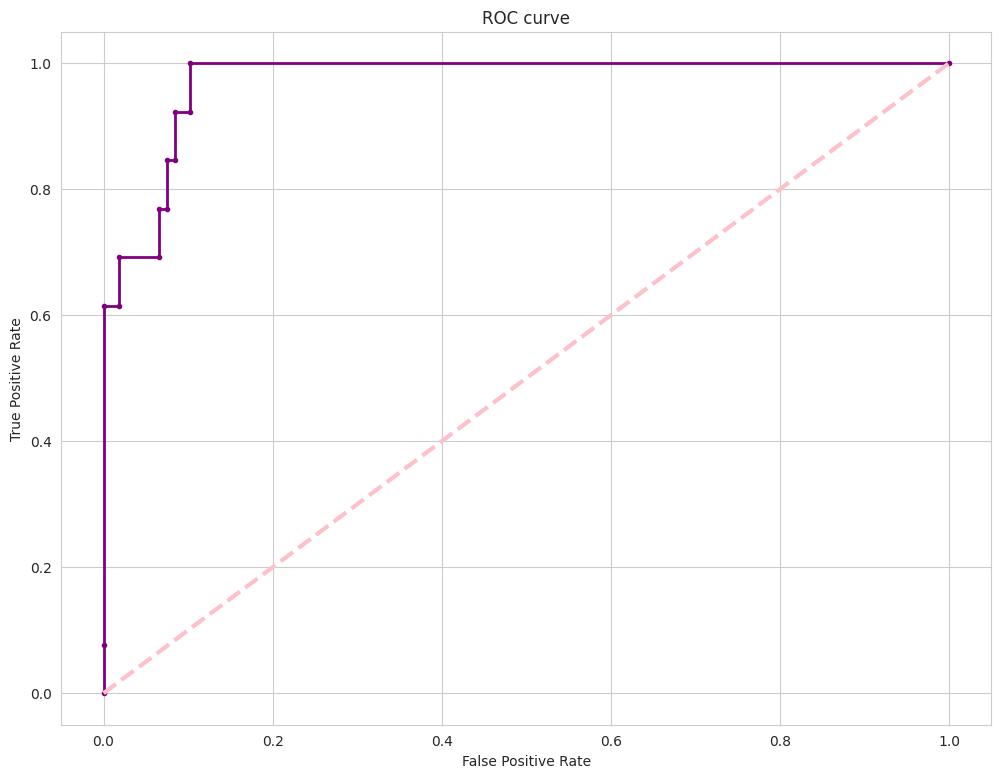

Площадь под ROC-кривой (AUC): 0.9734004313443566


In [133]:
#построение ROC кривой
y_probs = log_model.predict_proba(X_test)[:,1]

# Построение ROC-кривой
fpr, tpr, lev = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, marker='.')
plt.plot([0, 1], [0, 1], color='pink', lw=3, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(y_test, y_probs)
print("Площадь под ROC-кривой (AUC):", auc_roc)

Площадь близка к единице, но опять же, возможно, для несбалансированных классов это не самая удачная метрика ( а какая удачная?)
Я нашла, что для несбалансированных классов лучше смотреть на  кривую precision-recall, которая 


AUC под Precision-Recall кривой: 0.849548246338696


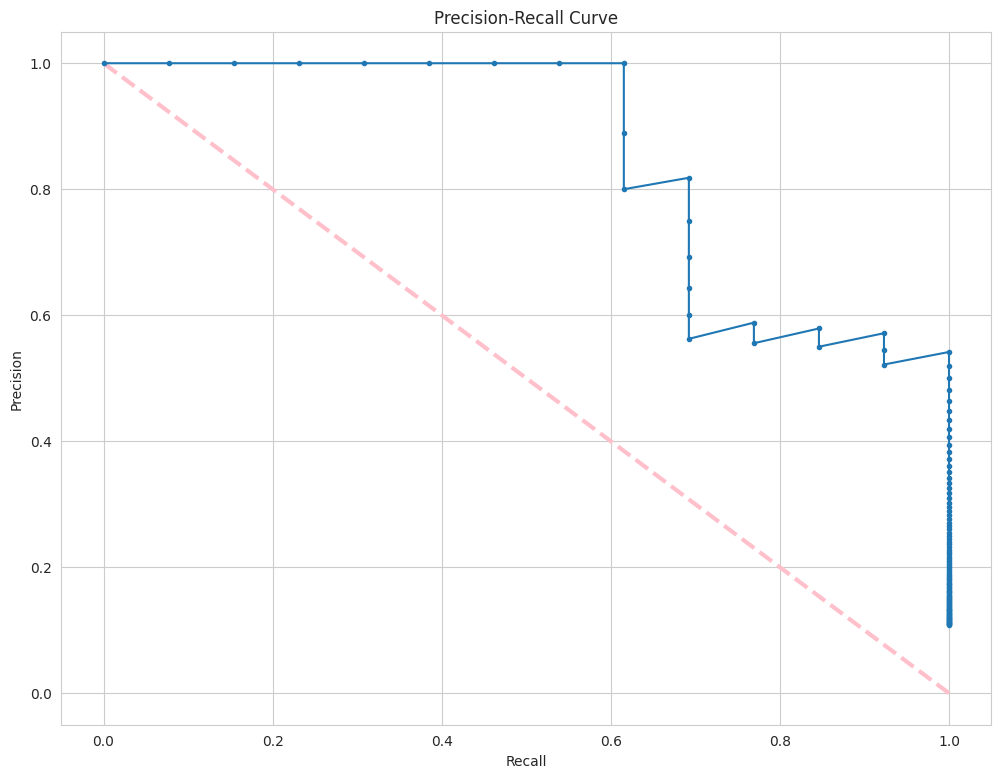

In [134]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Строим кривую Precision-Recall
plt.figure()
plt.plot([1, 0], [0, 1], color='pink', lw=3, linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Рассчитываем площадь под кривой Precision-Recall

auc_pr = auc(recall, precision)
print('AUC под Precision-Recall кривой:', auc_pr)

Дальше я проделываю то же самое, но, убрав, колонку Total как обобщающий фактор. Интересно как изменится модель. По сути повторяется, но для себя оставила

/tmp/ipykernel_6941/3001508543.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pokemon1.Legendary = pokemon1.Legendary.replace({True : 1, False : 0})


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,
Bulbasaur,45,49,49,65,65,45,1
Ivysaur,60,62,63,80,80,60,1
Venusaur,80,82,83,100,100,80,1
VenusaurMega Venusaur,80,100,123,122,120,80,1
Charmander,39,52,43,60,50,65,1


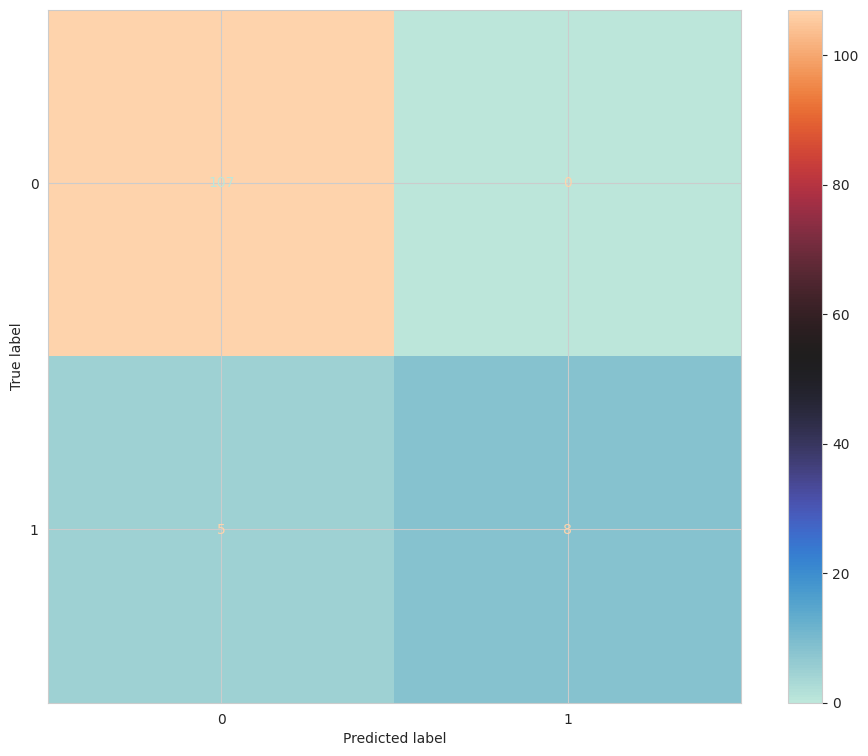

Accuracy =  0.9583333333333334
Precision =  1.0
Recall =  0.6153846153846154
F1 Score =  0.7619047619047619
вклад параметров по возрастанию


Attack        0.583219
HP            0.675254
Generation    0.750456
Defense       1.043980
Sp. Atk       1.092318
Sp. Def       1.157654
Speed         1.411178
dtype: float64

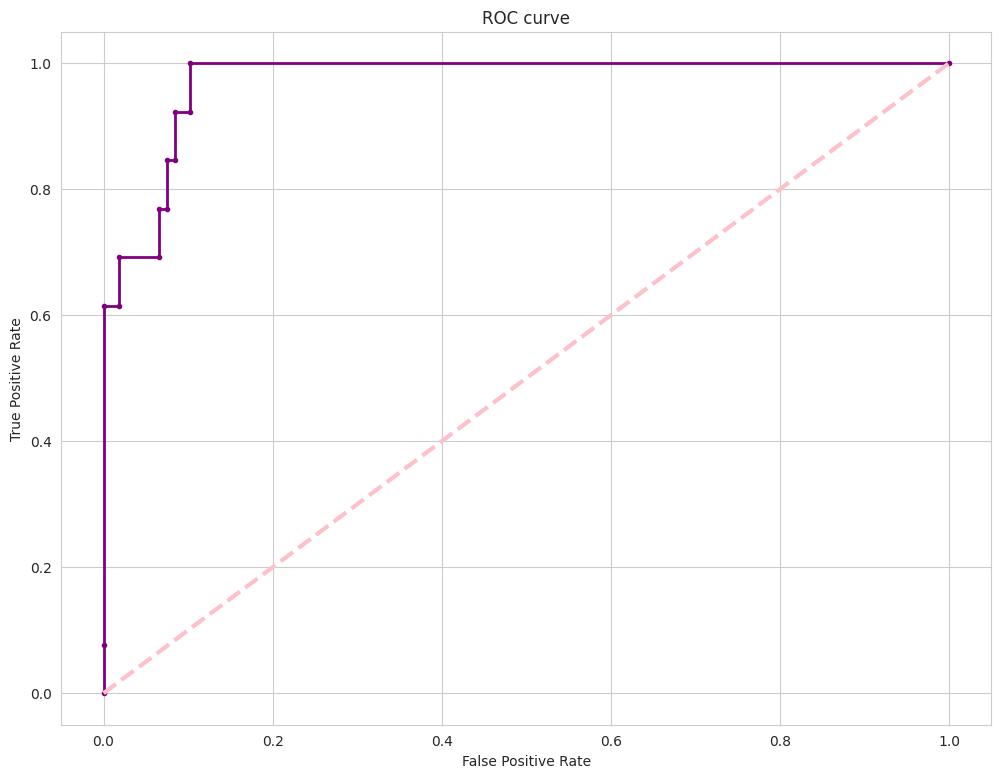

Площадь под ROC-кривой (AUC): 0.9734004313443566
AUC под Precision-Recall кривой: 0.849548246338696


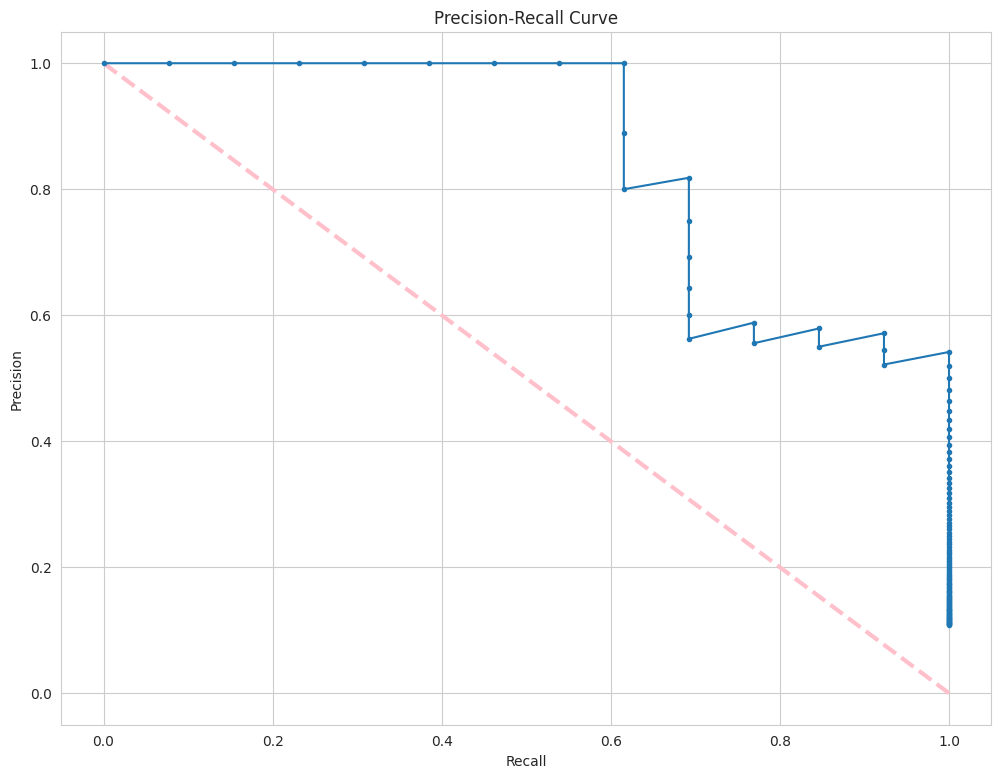

In [135]:
# Повторю, убрав колонку Total
pokemon1 = pd.read_csv("../Data/Pokemon.csv")
pokemon1.set_index('Name', inplace = True)
pokemon1.Legendary = pokemon1.Legendary.replace({True : 1, False : 0})
y = pokemon1.Legendary
pokemon1.drop(columns = ['Type 1', 'Type 2', '#'], axis = 1, inplace = True)


X = pokemon1.drop(columns = ['Legendary','Total'], axis = 1)
display(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)
# сделаем стандартизацию
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_model = LogisticRegression(max_iter = 2000)
log_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = log_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
disp.plot(cmap = "icefire")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 Score = ", f1)
feature_weight = log_model.coef_.ravel()

importance = (pd.Series(feature_weight, index=X.columns))
print ('вклад параметров по возрастанию')
display(importance.sort_values())

#построение ROC кривой
y_probs = log_model.predict_proba(X_test)[:,1]

# Построение ROC-кривой
fpr, tpr, lev = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, marker='.')
plt.plot([0, 1], [0, 1], color='pink', lw=3, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

roc_auc = roc_auc_score(y_test, y_probs)
print("Площадь под ROC-кривой (AUC):", roc_auc)

precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Строим кривую Precision-Recall
plt.figure()
plt.plot([1, 0], [0, 1], color='pink', lw=3, linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# Рассчитываем площадь под кривой Precision-Recall
pr_auc = auc(recall, precision)
print('AUC под Precision-Recall кривой:', pr_auc)

Похоже на то, что было до этого

### Задание 4. Расскажите о вашей любимой музыкальной группе (исполнителе) (0.5 балла)

Расскажите, как вы познакомились с этой группой и скиньте несколько наиболее любимых треков)

Долго думала, но не дольше, чем над логистической регрессией, и поняла, 
что мне надо рассказать про NoizeMC, я немногим младше Ивана, и начинали мы его слушать еще в общаге со времен Face2Face
"Кошки". И вот этого девчачьего "что ей снится....когда слезы на ее ресницаааах")). 
А потом было много разного и разные времена и тяжелые времена, и песни Нойза, 
Детям буду рассказывать, что это голос моего поколения
Пусть будет "Вселенная бесконечна?"

## Therapy time

Напишите здесь ваши впечатления о задании: было ли интересно, было ли слишком легко или наоборот сложно и тд. Также сюда можно написать свои идеи по улучшению заданий, а также предложить данные, на основе которых вы бы хотели построить следующие дз. 

**Ваши мысли:**

Очень хочется разборов ДЗ, особенно в части EDA и того как выбирать данные для обучения и подходящую модель.
И в плане того, как организовано это ДЗ в плане всех этих классов классов